# Wildfire Image Classification

https://github.com/shrey24/wildfire-detection-from-satellite-images-ml/blob/master/research.ipynb

https://www.kaggle.com/code/franvaluch/easy-wild-fire-detection

https://github.com/pereira-gha/activefire

https://www.kaggle.com/code/ashukr/wild-fire-satellite-image-processing/notebook

https://webthesis.biblio.polito.it/8197/1/tesi.pdf

https://github.com/sentinel-hub/example-notebooks/blob/master/Wildfires%20from%20Satellite%20Images.ipynb

### Load Data

In [5]:
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [6]:
base_dir = '../../data/images'

In [13]:
train_data = image_dataset_from_directory(base_dir,
                                                  image_size=(200,200),
                                                  subset='training',
                                                  seed = 1,
                                                 validation_split=0.1,
                                                  batch_size= 32)


Found 32 files belonging to 2 classes.
Using 29 files for training.


In [14]:
test_data = image_dataset_from_directory(base_dir,
                                                  image_size=(200,200),
                                                  subset='validation',
                                                  seed = 1,
                                                 validation_split=0.1,
                                                  batch_size= 32)

Found 32 files belonging to 2 classes.
Using 3 files for validation.


In [18]:
train_data

<BatchDataset element_spec=(TensorSpec(shape=(None, 200, 200, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

### EDA

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

TypeError: 'BatchDataset' object is not subscriptable

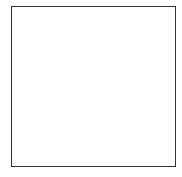

In [15]:
#plot first 9 with category
plt.figure(figsize = (10,10))
for i in range(9):                          #plot the first 9 items
    plt.subplot(3,3,i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    plt.imshow(train_data[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

plt.show()

In [28]:
import numpy as np

In [27]:
import keras.utils as image

In [25]:
from keras.models import load_model

In [19]:
def plot_image(img_array):
    img = np.array(img_array, np.int32)
    plt.imshow(img)

In [29]:
#let's print a test image from the train set
test_image = image.load_img('../../data/images/train/fire/3500.jpeg')
test_image = image.img_to_array(test_image)

In [30]:
print(test_image.shape)

(1200, 1200, 3)


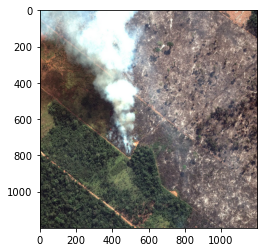

In [31]:
plot_image(test_image)

In [33]:
def plot_images(img, labels, nrows, ncols):
    """ Plot nrows x ncols images
    """
    fig, axes = plt.subplots(nrows, ncols)
    print(len(axes.flat))
    
    for i, ax in enumerate(axes.flat): 
        ax.imshow(img[i])
        ax.set_xticks([]); ax.set_yticks([])
        ax.set_title(labels[i])


In [ ]:
plot_images(???, 3, 3)

### Data Augmentation

In [34]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [35]:
train_data = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_data = ImageDataGenerator(rescale = 1./255)

In [51]:
training_set = train_data.flow_from_directory('../../data/images/train',
                                                 target_size = (64, 64),          #this has to match the size from architecture
                                                 batch_size = 50,
                                                 class_mode = 'binary')

test_set = test_data.flow_from_directory('../../data/images/test',
                                            target_size = (64, 64),
                                            batch_size = 50,                  # generate 100 more
                                            class_mode = 'binary')

Found 26 images belonging to 2 classes.
Found 8 images belonging to 2 classes.


In [ ]:
# did that work?

### Model

In [ ]:
# I feel like I was supposed to do this?
#normalize
train_images = train_images/255.0         #want it to be a float
test_images = test_images/255.0

In [1]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

In [38]:
#create model
classifier = Sequential()

classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Flatten())
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))      #1 bc this is a binary classification
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [40]:
# compile
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [49]:
history = classifier.fit_generator(training_set,
                         steps_per_epoch = 5,
                         epochs = 5,
                         validation_data = test_set)

C:\Users\3_hal\AppData\Local\Temp\ipykernel_14364\2056946886.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = classifier.fit_generator(training_set,


Epoch 1/5
5/5 [==============================] - 3s 255ms/step - loss: 1.7150 - accuracy: 0.5000 - val_loss: 1.2521 - val_accuracy: 0.5714


In [ ]:
# predict
y_pred = model.predict(test_images)
y_pred

In [ ]:
#save model as pickle

In [ ]:
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()